In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


In [0]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('emails.csv',  encoding='utf-8')


Saving emails.csv to emails.csv


In [0]:
df.shape

(5726, 2)

In [0]:
df.head(5)

,text,class
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [0]:
#Print the shape (Get the number of rows and cols)
df.shape

(5726, 2)

In [0]:
#choose 2 fields we need, class and text
df = df[["text", "class"]]

In [0]:
df.shape

(5726, 2)

In [0]:
#Checking for duplicates and removing them
df.drop_duplicates(inplace = True)

In [0]:
df.shape

(5693, 2)

In [0]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [0]:
df['class'].value_counts() 

0    4325
1    1368
Name: class, dtype: int64

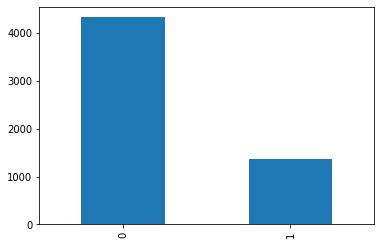

In [0]:
df['class'].value_counts().plot(kind='bar')

In [0]:
def email_lowercase(email):
    # converting email to lowercase
    email = email.lower()
    return email


In [0]:
! pip install nltk

In [0]:
import nltk
nltk.download()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [0]:
nltk.download('stopwords')
from nltk import stem

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
stemmer = stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))

In [0]:
def alternative_email(email):
    # converting messages to lowercase
    email = email.lower()
    # removing stopwords
    email = [word for word in email.split() if word not in stopwords]
    # using a stemmer
    email = " ".join([stemmer.stem(word) for word in email])
    return email

In [0]:
df['text'] = df['text'].apply(email_lowercase)

In [0]:
df['text'] = df['text'].apply(alternative_email)

In [0]:
from sklearn.utils import shuffle

In [0]:

df = shuffle(df)

In [0]:
#Split data into 80% training & 20% testing data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size = 0.20, random_state = 42)

In [0]:
cout_zero_train = 0
cout_one_train = 0
for i in y_train:
  if i == 0:
    cout_zero_train += 1
  else:
    cout_one_train += 1


In [0]:
cout_one_train

1089

In [0]:
cout_zero_train

3465

In [0]:
cout_zero_train / cout_one_train

3.1818181818181817

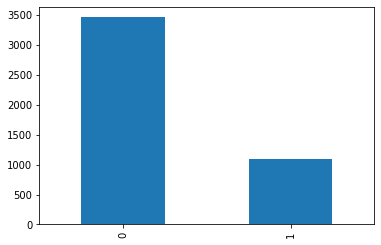

In [0]:
y_train.value_counts().plot(kind='bar')


In [0]:
cout_zero_test = 0
cout_one_test = 0
for i in y_test:
  if i == 0:
    cout_zero_test += 1
  else:
    cout_one_test += 1

In [0]:
cout_one_test

279

In [0]:
cout_zero_test

860

In [0]:
cout_zero_test / cout_one_test

3.082437275985663

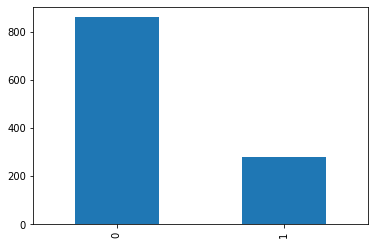

In [0]:
y_test.value_counts().plot(kind='bar')

**We combine Gridserach and Gridsearch to speed up trainning fase**

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline(steps=[
  ('vectorize', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
  ('classifier', RandomForestClassifier())
])


In [0]:
params = {
  
    'classifier__max_depth' : [50, 100, None],
    'classifier__class_weight':[{0:0.9, 1:1}, {0:1, 1:0.9}, {0:1, 1:5},"balanced"],
    'classifier__min_samples_leaf' : [3, 5],
    'classifier__min_samples_split' : [2, 3, 5],
    
}

In [0]:
from  sklearn.metrics import accuracy_score 
from  sklearn.metrics import f1_score
from  sklearn.metrics import precision_score


In [0]:
grid_search = GridSearchCV(pipeline, param_grid=params, scoring=make_scorer(f1_score), cv=3)

In [0]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorize',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                       

In [0]:
# Results from Grid Search
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",
          grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",
          grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",
          grid_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(memory=None,
         steps=[('vectorize',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabular...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=100,
                                        max_featur

In [0]:
#Evaluate the model on the testing  data set 
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

pred = grid_search.predict(X_test)

print(classification_report(y_test, pred ))

confusionMatrix = confusion_matrix(y_test, pred)

# evalue false positive rate, in other way ham email but predict spam email
falsePositive = confusionMatrix[0][1]
trueNegative = confusionMatrix[0][0]
falseNegative = confusionMatrix[1][0]
truePositive =  confusionMatrix[1][1]

falsePositiveRate = falsePositive / (falsePositive + trueNegative )
falseNegativeRate = falseNegative / (falseNegative + truePositive )


print("False positive number  :", falsePositive)
print("True negative number  :", trueNegative)
print("False negative number :", falseNegative)
print("True positive number  :", truePositive)
print()
print("False positive rate : ", falsePositiveRate)
print("False negative rate :", falseNegativeRate)
print('Accuracy: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       860
           1       0.98      0.98      0.98       279

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139

False positive number  : 7
True negative number  : 853
False negative number : 5
True positive number  : 274

False positive rate :  0.00813953488372093
False negative rate : 0.017921146953405017
Accuracy:  0.9894644424934153


*The result is not bad. But the ham email  is often put in the spam box will make us feel more uncomfortable than the spam email being put in regular mail*.
So now will **change the thresold** to predict  them more exactly.

In [0]:
#Evaluate the model on the testing  data set with changing thresold
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

pred_grid = grid_search.predict_proba(X_test)

len_test = pred_grid.shape[0]
final_predict= np.zeros((len_test,1)) 

for i in range(len_test):
  if pred_grid[i][0] < 0.48:
    final_predict[i] = 1
  else:
    final_predict[i] = 0

print(classification_report(y_test, final_predict ))

confusionMatrix = confusion_matrix(y_test, final_predict)

# evalue false positive rate, in other way ham email but predict spam email
falsePositive = confusionMatrix[0][1]
trueNegative = confusionMatrix[0][0]
falseNegative = confusionMatrix[1][0]
truePositive =  confusionMatrix[1][1]

falsePositiveRate = falsePositive / (falsePositive + trueNegative )
falseNegativeRate = falseNegative / (falseNegative + truePositive )


print("False positive number  :", falsePositive)
print("True negative number  :", trueNegative)
print("False negative number :", falseNegative)
print("True positive number  :", truePositive)
print()
print("False positive rate : ", falsePositiveRate)
print("False negative rate :", falseNegativeRate)
print('Accuracy: ', accuracy_score(y_test, final_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       860
           1       0.98      0.98      0.98       279

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139

False positive number  : 6
True negative number  : 854
False negative number : 6
True positive number  : 273

False positive rate :  0.0069767441860465115
False negative rate : 0.021505376344086023
Accuracy:  0.9894644424934153


**The results do not seem to change significantly** 

**Now we use some hyperparameters for AdaBoost to uppower our predict**


In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
cv = CountVectorizer()


In [0]:
X_train_cv = cv.fit_transform(X_train).toarray()


***After we have some hyperparameters of randomforest we now use them in AdaBoostClassifier***

In [0]:
# Create adaboost classifer object
clf = RandomForestClassifier(n_estimators=1000, class_weight = 'balanced', min_samples_leaf =  3, min_samples_split =  3, n_jobs=-1);
ada = AdaBoostClassifier(
                        base_estimator=clf,n_estimators=clf.n_estimators
                         )

In [0]:
ada.fit(X_train_cv, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=3,
                                 

**Now let's test in test set**

In [0]:
X_test_cv = cv.transform(X_test)

In [0]:
#Evaluate the model on the testing  data set 
# AdaBoost + RandomForest 
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

pred_ada_test = ada.predict(X_test_cv)




print(classification_report(y_test, pred_ada_test ))

confusionMatrix_ada = confusion_matrix(y_test, pred_ada_test)

# evalue false positive rate, in other way ham email but predict spam email
falsePositive_ada = confusionMatrix_ada[0][1]
trueNegative_ada = confusionMatrix_ada[0][0]
falseNegative_ada = confusionMatrix_ada[1][0]
truePositive_ada =  confusionMatrix_ada[1][1]

falsePositiveRate_ada = falsePositive_ada / (falsePositive_ada + trueNegative_ada )
falseNegativeRate_ada = falseNegative_ada / (falseNegative_ada + truePositive_ada )


print("False positive number  :", falsePositive_ada)
print("True negative number  :", trueNegative_ada)
print("False negative number :", falseNegative_ada)
print("True positive number  :", truePositive_ada)
print()
print("False positive rate : ", falsePositiveRate_ada)
print("False negative rate :", falseNegativeRate_ada)
print('Accuracy: ', accuracy_score(y_test, pred_ada_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       0.99      0.99      0.99       279

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139

False positive number  : 4
True negative number  : 856
False negative number : 3
True positive number  : 276

False positive rate :  0.004651162790697674
False negative rate : 0.010752688172043012
Accuracy:  0.9938542581211589


**WOOOW ! It seem be pretty good results**

***Finally, we put it together : Adaboost + RandomForest + Change thresold***



How to choose the good thresold? The threshold in test and train is the same? 


**We propose a formula:** 



        test thresold = train thresold /  train_label_rate * test_label_rate 

**The formuala is not based on any article or paper , this thresold is due to our experiments**

In [0]:
#Evaluate the model on the testing  data set 
# AdaBoost + RandomForest + Changing thresold
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix


# Change thresold
'''             
The threshold for the test set is calculated by : 0.48 / 3.19 * 3.08 ≈ 0.46
                  so we choose 0.46 is thresold for test
'''
pred_ada_test = ada.predict_proba(X_test_cv)
len_test_ada = pred_ada_test.shape[0]
final_predict_test = np.zeros((len_test,1)) 
for i in range(len_test_ada):
  if pred_ada_test[i][0] < 0.46:
    final_predict_test[i] = 1
  else:
    final_predict_test[i] = 0


print(classification_report(y_test, final_predict_test ))

confusionMatrix_ada = confusion_matrix(y_test, final_predict_test)

# evalue false positive rate, in other way ham email but predict spam email
falsePositive_ada = confusionMatrix_ada[0][1]
trueNegative_ada = confusionMatrix_ada[0][0]
falseNegative_ada = confusionMatrix_ada[1][0]
truePositive_ada =  confusionMatrix_ada[1][1]

falsePositiveRate_ada = falsePositive_ada / (falsePositive_ada + trueNegative_ada )
falseNegativeRate_ada = falseNegative_ada / (falseNegative_ada + truePositive_ada )


print("False positive number  :", falsePositive_ada)
print("True negative number  :", trueNegative_ada)
print("False negative number :", falseNegative_ada)
print("True positive number  :", truePositive_ada)
print()
print("False positive rate : ", falsePositiveRate_ada)
print("False negative rate :", falseNegativeRate_ada)
print('Accuracy: ', accuracy_score(y_test, final_predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       0.99      0.99      0.99       279

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139

False positive number  : 2
True negative number  : 858
False negative number : 4
True positive number  : 275

False positive rate :  0.002325581395348837
False negative rate : 0.014336917562724014
Accuracy:  0.9947322212467077


**Our team presented our result and some ideas in studying.**


*Here is an illustration of the 2th decision tree  in a random forest*

![alt text](https://drive.google.com/uc?id=1mTRXAjZhtcA3CNFta5HkoUG33wnqNqCo)

In [0]:
#                                                                                      THE END!                                                                                                              #                                                 #